##  data - composition - subclusters

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os, sys, string

sc.set_figure_params(vector_friendly=False, fontsize=18)

import pandas as pd
import numpy as np

import anndata

from scipy.io import mmwrite

import matplotlib.pyplot as plt
from collections import Counter

from typing import Tuple, Union, List, Dict, Callable
import os
import gzip
import shutil
import inspect
import h5py
from matplotlib.pyplot import rc_context

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def makedirs(dirpath):
    if not os.path.exists(dirpath):
        os.system("mkdir "+ dirpath)

In [3]:
home      = "/Users/shayat/Documents/Aachen/projects/training_gcb2023/"
datahome  = home+ "data/"
resulthome= home+ "results/"

In [4]:
makedirs(home)
makedirs(datahome)
makedirs(resulthome)

In [5]:
cluster_file = "heart_fibroblasts_0.h5ad"

## START

In [6]:
adata = sc.read_h5ad(resulthome+cluster_file)

In [7]:
adata

AnnData object with n_obs × n_vars = 6288 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.7', 'leiden0.1', 'leiden0.3', 'leiden0.5'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'leiden0.7_colors', 'major_labl_colors', 'rank_genes_groups0.1', 'rank_genes_groups0.3', 'rank_genes_groups0.5', 'rank_genes_groups0.7', 'sample_colors'
    obsm: 'X_harmony', 'X_pca', 'X_pca_harm

In [8]:
cluster_file

'heart_fibroblasts_0.h5ad'

In [9]:
cluster_key = 'leiden0.5'
myclusters  = adata.obs[cluster_key].drop_duplicates().values.tolist()

In [10]:
#adata = adata[~adata.obs[cluster_key].isin(clusters_to_delete)].copy()

In [11]:
adata

AnnData object with n_obs × n_vars = 6288 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.7', 'leiden0.1', 'leiden0.3', 'leiden0.5'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'leiden0.7_colors', 'major_labl_colors', 'rank_genes_groups0.1', 'rank_genes_groups0.3', 'rank_genes_groups0.5', 'rank_genes_groups0.7', 'sample_colors'
    obsm: 'X_harmony', 'X_pca', 'X_pca_harm

In [12]:
#plot_umap(adata, "black", "aging kidney")

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


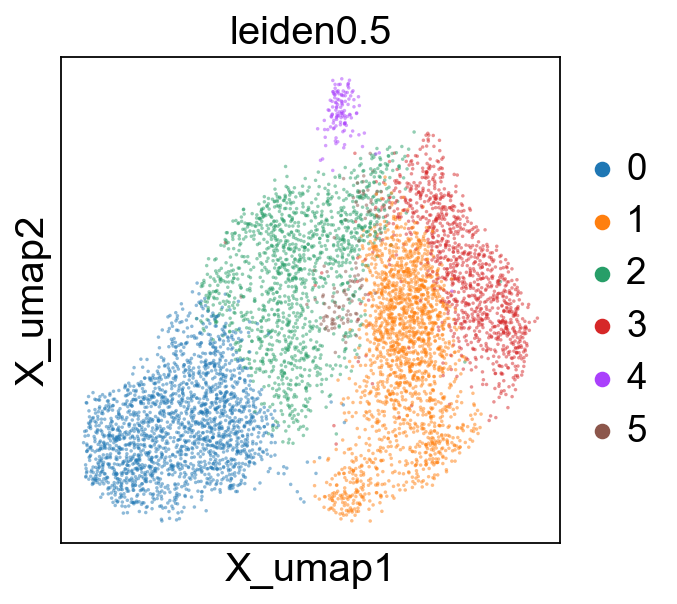

In [13]:
# check out how it looks by sample
plt.figure(figsize=(4, 4))
sc.pl.embedding(adata, basis='X_umap', color=cluster_key, ax=plt.gca(), size=10, alpha=0.5)

In [14]:
#append_scrublet_to_adata(adata, sample_key="ident")

In [15]:
Counter(adata.obs["major_labl"])

Counter({'FZ': 1165, 'CTRL': 1006, 'IZ': 2080, 'BZ': 752, 'RZ': 1285})

In [16]:
res = 1.1

In [17]:
#Counter(adata.var["highly_variable"])

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


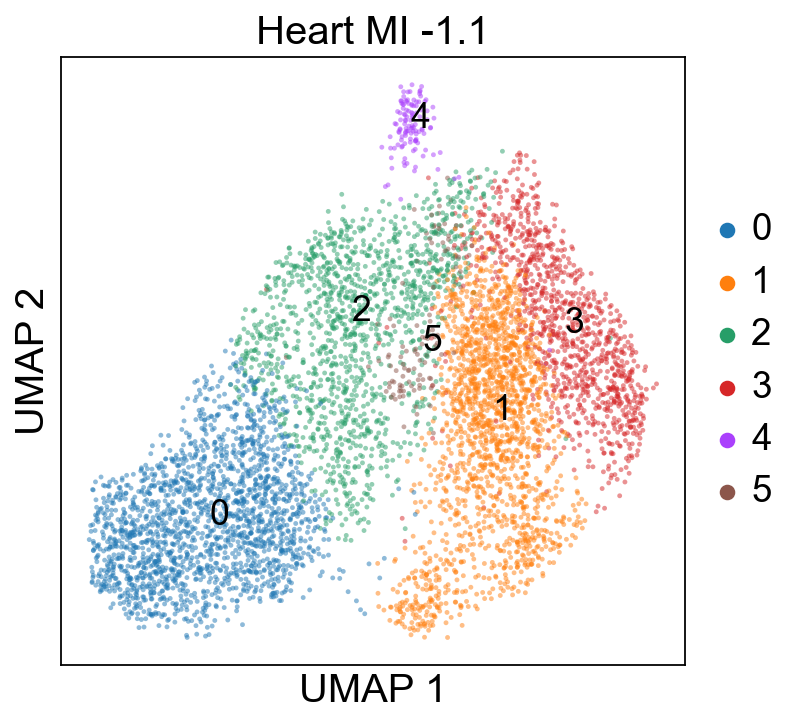

In [18]:
# show clustering with numbers
#res = 0.1

plt.figure(figsize=(5, 5))
sc.pl.embedding(adata, basis='umap', color=cluster_key, ax=plt.gca(), alpha=0.5, show=False)

df = pd.DataFrame(adata.obsm['X_umap'])
df['cluster'] = adata.obs[cluster_key].values
mean_pos = df.groupby('cluster').median()

for c in mean_pos.index:    
    plt.gca().text(mean_pos.loc[c][0], mean_pos.loc[c][1], c.split(':')[0], 
                   fontsize=16, color='black')

# plt.tight_layout()
# fig.savefig(fig_prefix + '_umap_' + key + '.pdf', bbox_inches='tight')

plt.title('Heart MI -' + str(res))
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.show()

In [19]:
print(adata.obs.columns.tolist())

['sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.7', 'leiden0.1', 'leiden0.3', 'leiden0.5']


## Run scCODA

In [20]:
import altair as alt
import pertpy as pt

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

2023-09-10 01:41:03.311140: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Global seed set to 0
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightni

In [21]:
print(anndata.__version__)
print(sc.__version__)
print(h5py.__version__)
print(pt.__version__)

0.8.0
1.9.2
3.8.0
0.4.0


In [22]:
#!pip install pertpy
#!pip install ete3
###!pip3 install --force-reinstall pertpy==0.3.0 ## Not needed

In [23]:
#from pertpy.tools._coda import coda
from pertpy.tools._coda._sccoda import Sccoda
from pertpy.plot._coda import CodaPlot as coda

In [24]:
#adata = pt.dt.haber_2017_regions()

In [25]:
adata

AnnData object with n_obs × n_vars = 6288 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.7', 'leiden0.1', 'leiden0.3', 'leiden0.5'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'leiden0.7_colors', 'major_labl_colors', 'rank_genes_groups0.1', 'rank_genes_groups0.3', 'rank_genes_groups0.5', 'rank_genes_groups0.7', 'sample_colors', 'leiden0.5_colors'
    obsm: 'X_harmony', 

In [26]:
adata.obs.head(3)

,sample,n_counts,n_genes,percent_mito,doublet_score,dissociation_score,cell_type_original,patient_region_id,patient,patient_group,...,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,scrublet,leiden0.7,leiden0.1,leiden0.3,leiden0.5
ACTTAGGTCTAATTCC-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK159,931.0,660,0.214823,0.000417,0.066989,Adipocyte,RZ/FZ_P5,P5,myogenic,...,0,659,820.0,2.0,0.243902,0.135593,0,0,2,2
TTCTTCCGTATTGACC-1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK162,688.0,602,1.453488,0.002359,0.072044,Adipocyte,FZ/GT_P4,P4,fibrotic,...,0,601,675.0,10.0,1.481481,0.151832,0,0,2,2
TCATACTGTCGTACTA-1_1_1_1_1_1_1_1_1_1-0,CK358,2690.0,1730,0.074349,0.179092,0.004514,Adipocyte,control_P8,P8,myogenic,...,0,1729,2405.0,2.0,0.083160,0.049774,0,0,0,1


In [27]:
#adata.obs['subcluster_name'] = adata.obs['main_class'].astype(str) + '_' + adata.obs['subcluster'].astype(str)

In [28]:
adata.obs[[cluster_key]].drop_duplicates().sort_values(by=cluster_key).tail(20)

,leiden0.5
CGTCCATTCTACGGTA-1_2_1_1_1-0,0
TCATACTGTCGTACTA-1_1_1_1_1_1_1_1_1_1-0,1
ACTTAGGTCTAATTCC-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0,2
AACGTCAAGAAGTCTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1-2,3
ATGCATGCATGTGCTA-1_2_1_1-2,4
AAAGTGAAGCTACAAA-1_2_1_1_1_1_1-0,5


In [29]:
#adata = adata[adata.obs['main_class'].isin(['PTs', 'aPT_dTL'])].copy()

In [30]:
adata

AnnData object with n_obs × n_vars = 6288 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.7', 'leiden0.1', 'leiden0.3', 'leiden0.5'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'leiden0.7_colors', 'major_labl_colors', 'rank_genes_groups0.1', 'rank_genes_groups0.3', 'rank_genes_groups0.5', 'rank_genes_groups0.7', 'sample_colors', 'leiden0.5_colors'
    obsm: 'X_harmony', 

In [31]:
adata.obs[['sample', 'patient', 'major_labl']].drop_duplicates().sort_values(by='patient')

,sample,patient,major_labl
AAGACAATCAACTTTC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-2,CK158,P1,CTRL
TGTAGACTCACTTTGT-1_2_1_1_1_1_1_1_1_1_1_1_1-4,CK163,P2,BZ
CTCCTCCTCGGCCCAA-1_2_1_1_1_1_1_1_1_1-2,CK359,P2,RZ
CACAACACAAGAGGTC-1_2_1_1_1_1_1_1_1_1_1_1-2,CK165,P2,IZ
AACGTCAAGAAGTCTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1-2,CK160,P3,BZ
GATCATGCACGTTCGG-1_1_1_1_1_1_1_1_1_1_1_1-2,CK164,P3,RZ
TTCTTCCGTATTGACC-1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK162,P4,FZ
ACTTAGGTCTAATTCC-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK159,P5,FZ
AAACGCTTCTACGCGG-1_1_1_1_1_1_1_1_1_1_1-2,CK356,P6,RZ
GGGCTACAGTCATGCT-1_2_1_1_1_1_1_1_1_1_1-4,CK357,P7,CTRL


In [32]:
sccoda_model = Sccoda()
sccoda_data  = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier=cluster_key,
    sample_identifier="sample",
    covariate_obs=["major_labl"],
)
sccoda_data

MuData object with n_obs × n_vars = 6316 × 27598
  var:	'n_cells'
  2 modalities
    rna:	6288 x 27592
      obs:	'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.7', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'scCODA_sample_id'
      var:	'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'cell_type_original_colors', 'leiden0.7_colors', 'major_labl_colors', 'rank_genes_groups0.1', 'rank_genes_groups0.3', 'rank_genes_groups0.5', 'rank_genes_groups0.7', 'sample_colors', 'leiden0.5_colors'
      obsm:	'X_harmony', 'X_pca', 'X_pca_harmony', 'X_umap'
    coda:	28 x 6
      obs:	'major_labl', 'sample'
      var:	'n_cells'

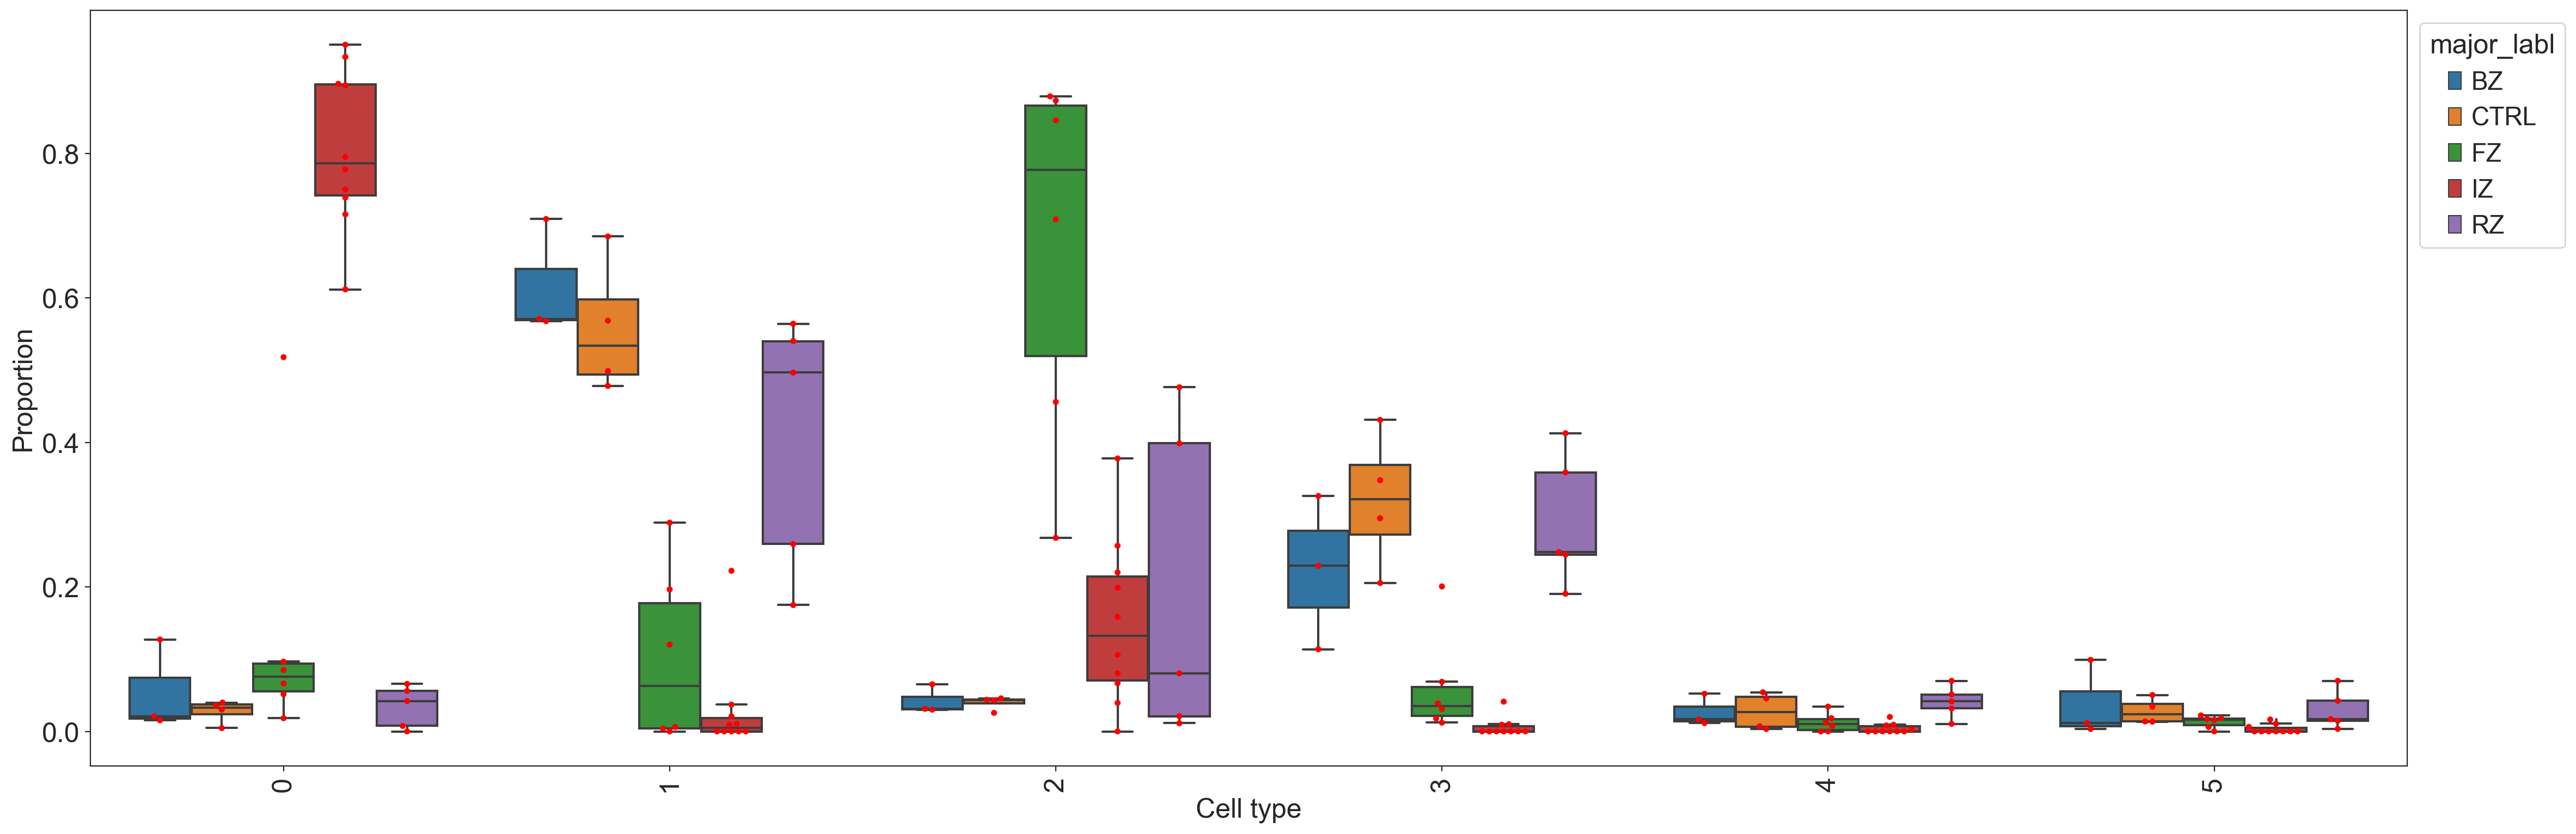

In [33]:
coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="major_labl",
    figsize=(24, 8),
    add_dots=True,
    plot_facets= False,
    cmap = "tab10",
    args_swarmplot={"palette": ["Red"], "size": 4, "linewidth": 0},
)
plt.show()

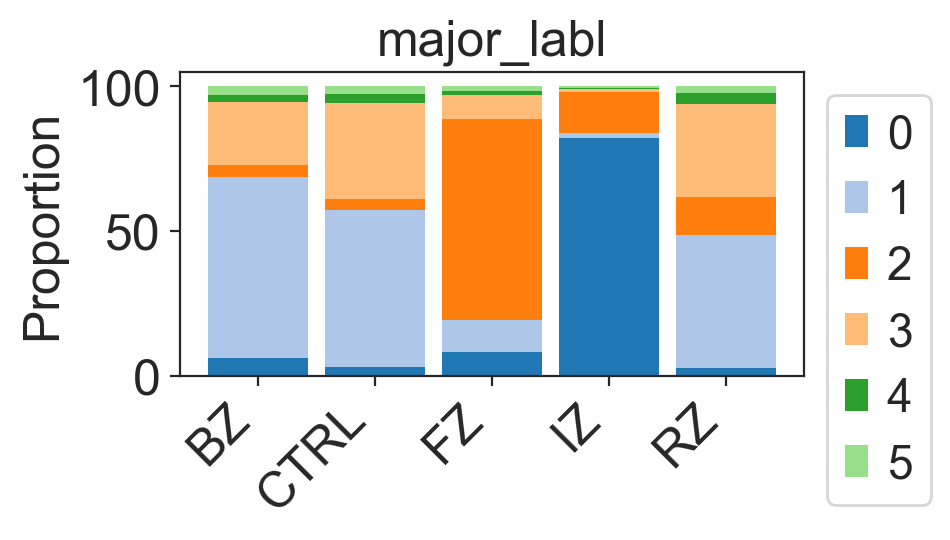

In [34]:
coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="major_labl", figsize=(4, 2)
)
plt.show()

In [35]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="major_labl",
    reference_cell_type="4",
)
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11000/11000 [02:56<00:00, 62.19it/s, 511 steps of size 8.89e-03. acc. prob=0.94]


In [36]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 28 × 6
    obs: 'major_labl', 'sample'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_major_labl[T.CTRL]', 'effect_df_major_labl[T.FZ]', 'effect_df_major_labl[T.IZ]', 'effect_df_major_labl[T.RZ]'

In [37]:
sccoda_data["coda"].varm["effect_df_major_labl[T.FZ]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
0,0.000000,-0.412,1.205,0.306,0.3501,20.006099,0.724225
1,-2.553672,-3.569,-1.531,0.532,1.0000,15.853096,-2.959946
2,1.640659,0.785,2.450,0.437,0.9950,145.284777,3.091195
3,-1.661345,-2.549,-0.680,0.474,0.9987,17.808783,-1.672590
4,0.000000,0.000,0.000,0.000,0.0000,13.158095,0.724225
5,0.000000,-1.206,0.447,0.289,0.3231,13.014150,0.724225


In [38]:
sccoda_data

MuData object with n_obs × n_vars = 6316 × 27598
  var:	'n_cells'
  2 modalities
    rna:	6288 x 27592
      obs:	'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.7', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'scCODA_sample_id'
      var:	'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'cell_type_original_colors', 'leiden0.7_colors', 'major_labl_colors', 'rank_genes_groups0.1', 'rank_genes_groups0.3', 'rank_genes_groups0.5', 'rank_genes_groups0.7', 'sample_colors', 'leiden0.5_colors'
      obsm:	'X_harmony', 'X_pca', 'X_pca_harmony', 'X_umap'
    coda:	28 x 6
      obs:	'major_labl', 'sample'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_major_labl[T.CTRL]', 'effect_df_major_labl[T.FZ]', 'effect_df_major_labl[T.IZ]', 'effect_df_major_labl[T.RZ]'

In [39]:
#sccoda_model.set_fdr(sccoda_data, 0.2)
sccoda_model.set_fdr(sccoda_data, 0.05)

In [40]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate           Cell Type
major_labl[T.CTRL]  0            False
                    1            False
                    2            False
                    3            False
                    4            False
                    5            False
major_labl[T.FZ]    0            False
                    1             True
                    2             True
                    3             True
                    4            False
                    5            False
major_labl[T.IZ]    0             True
                    1             True
                    2             True
                    3             True
                    4            False
                    5            False
major_labl[T.RZ]    0            False
                    1             True
                    2            False
                    3            False
                    4            False
                    5            False
Name: Final Parameter, dtype: bool

In [41]:
test_df = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame().reset_index()

In [42]:
test_df[test_df['Final Parameter']== True].head(30)

,Covariate,Cell Type,Final Parameter
7,major_labl[T.FZ],1,True
8,major_labl[T.FZ],2,True
9,major_labl[T.FZ],3,True
12,major_labl[T.IZ],0,True
13,major_labl[T.IZ],1,True
14,major_labl[T.IZ],2,True
15,major_labl[T.IZ],3,True
19,major_labl[T.RZ],1,True


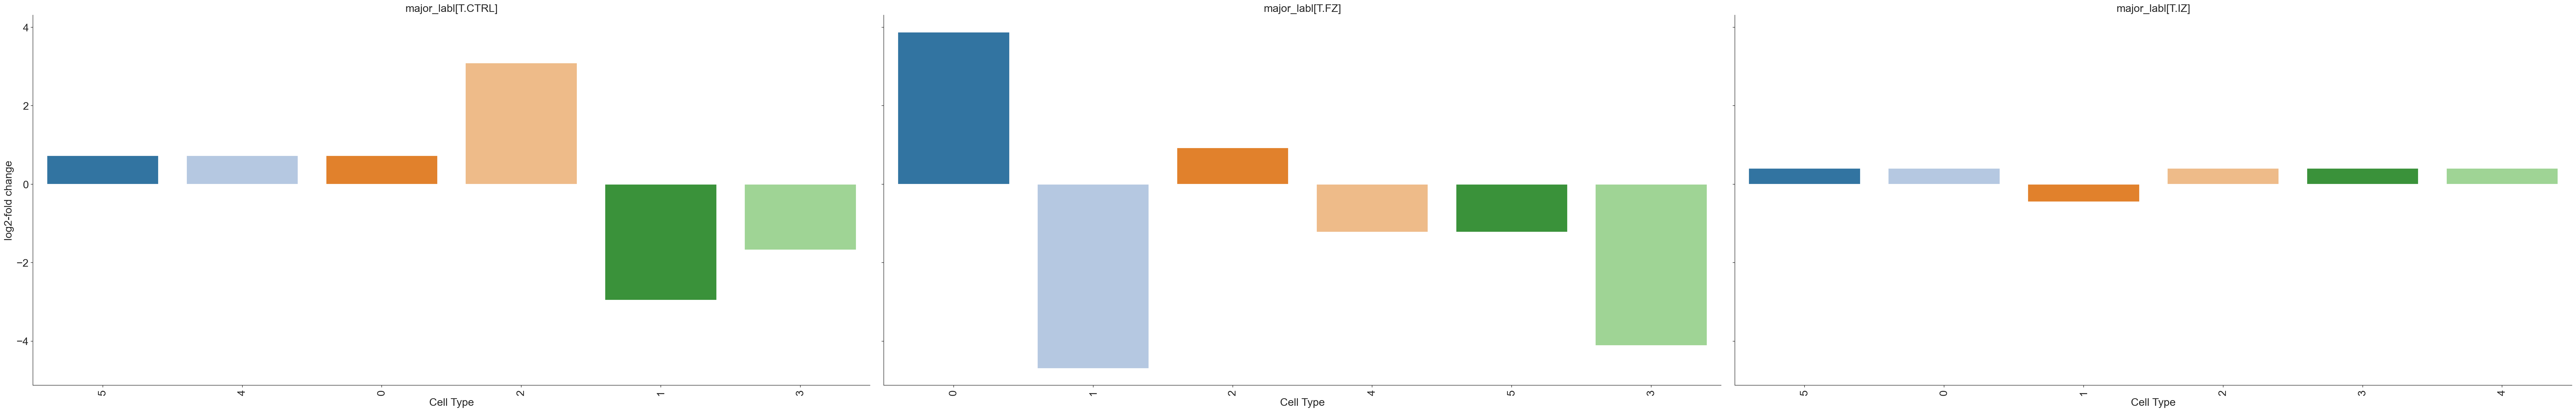

In [43]:
coda.effects_barplot(sccoda_data, "coda", "major_labl", figsize=(10, 20))
plt.show()